In [18]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Assuming the dataset is in CSV format
df = pd.read_csv(r"C:\Users\HP\Desktop\Deeplearning_Assignment1_Orbit\orbit - orbit.csv")

In [3]:
# Display the first few rows of the dataset
df.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [4]:
# Get summary information about data types, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_steps  2000 non-null   float64
 1   y           2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [5]:
# Statistical summary to check ranges, mean, etc.
df.describe()

,time_steps,y
count,2000.000000,2000.000000
mean,0.000000,33.366683
std,5.777835,29.851521
min,-10.000000,0.000025
25%,-5.000000,6.268792
50%,0.000000,25.025044
75%,5.000000,56.268780
max,10.000000,100.000000


In [6]:
# Check for missing values
df.isnull().sum()

time_steps    0
y             0
dtype: int64

In [7]:
# Ensure data types are correct
df['time_steps'] = pd.to_numeric(df['time_steps'], errors='coerce')
df['y'] = pd.to_numeric(df['y'], errors='coerce')


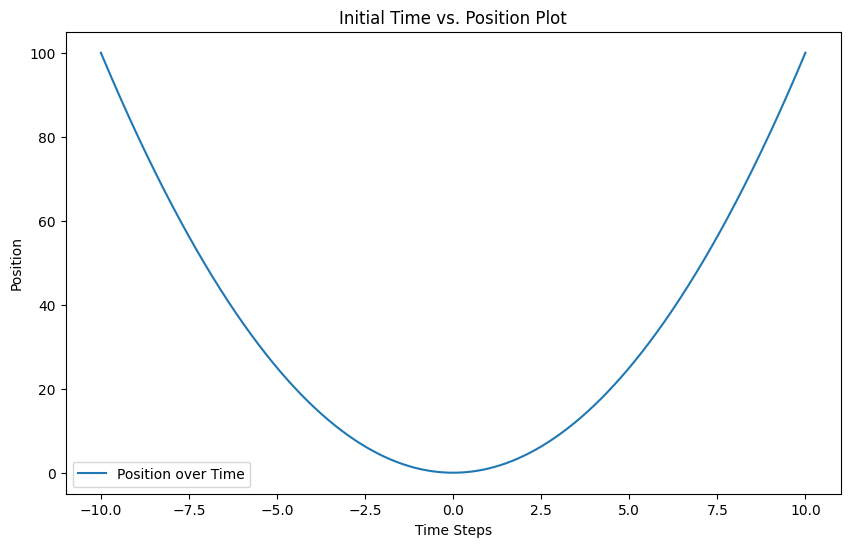

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['time_steps'], df['y'], label='Position over Time')
plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.title('Initial Time vs. Position Plot')
plt.legend()
plt.show()

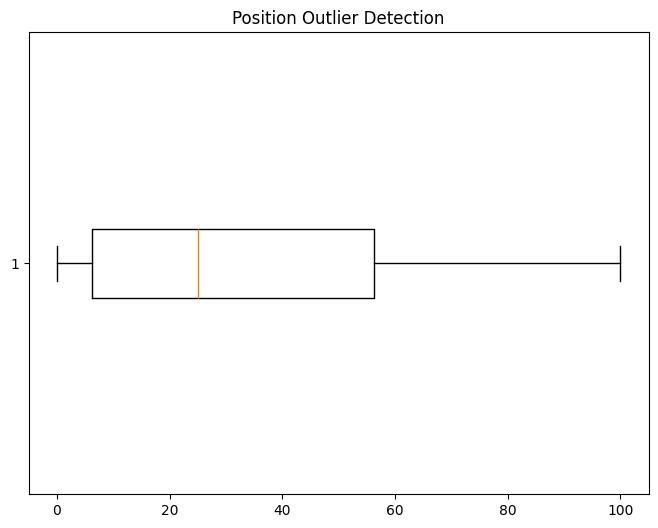

In [9]:
# Box plot to identify outliers
plt.figure(figsize=(8,6))
plt.boxplot(df['y'], vert=False)
plt.title('Position Outlier Detection')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Assuming X_poly is your input and y is your target
X_train, X_test, y_train, y_test = train_test_split(df['time_steps'], df['y'], test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)
X_train.shape

(1200,)

In [15]:
# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='linear')
])


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model with a validation set
history = model.fit(X_train, y_train, 
                    epochs=500, 
                    validation_data=(X_val, y_val),
                    batch_size=32,   # Optional: specify a batch size
                    verbose=1)       # Optional: set to 0 for silent training


Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1306.4800 - mean_absolute_error: 25.3548 - val_loss: 144.2726 - val_mean_absolute_error: 10.9225
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 279.4090 - mean_absolute_error: 13.2895 - val_loss: 127.0436 - val_mean_absolute_error: 8.3912
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186.0854 - mean_absolute_error: 9.8544 - val_loss: 61.7515 - val_mean_absolute_error: 6.1429
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 167.0343 - mean_absolute_error: 8.3921 - val_loss: 105.8549 - val_mean_absolute_error: 6.3768
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157.1362 - mean_absolute_error: 8.0311 - val_loss: 22.4169 - val_mean_absolute_error: 3.3522
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89.7049 - mean_absolute_error: 6.1146 - val_loss: 10.9752 - val_mean_absolute_error: 2.4969
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 129.5365 - mean_absolut

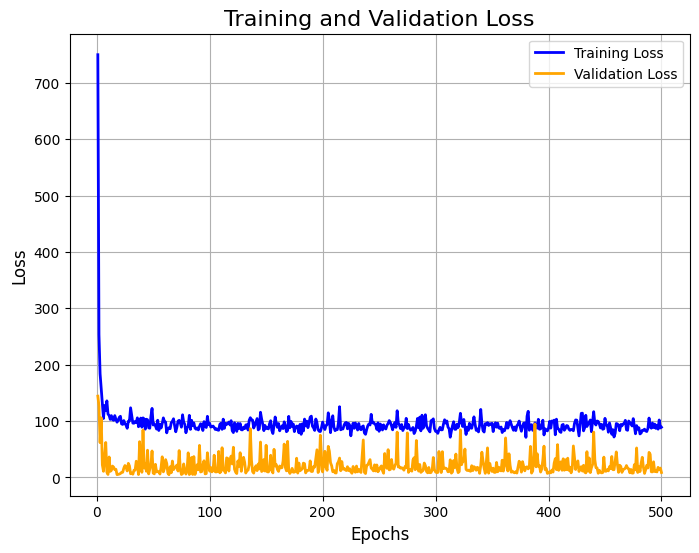

In [17]:
# Get training and validation loss from the model's history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the plot
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss', color='blue', linestyle='-', linewidth=2)  # Line for training loss
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', linestyle='-', linewidth=2)  # Line for validation loss

# Add labels, title, and legend
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)  # Add gridlines for better readability

# Show the plot
plt.show()

In [19]:
y_pred_test = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_test)
print("R-squared:", r2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
Mean Absolute Error (MAE): 2.199101357310591
Mean Squared Error (MSE): 9.500989156845053
R-squared: 0.988296047926165


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step


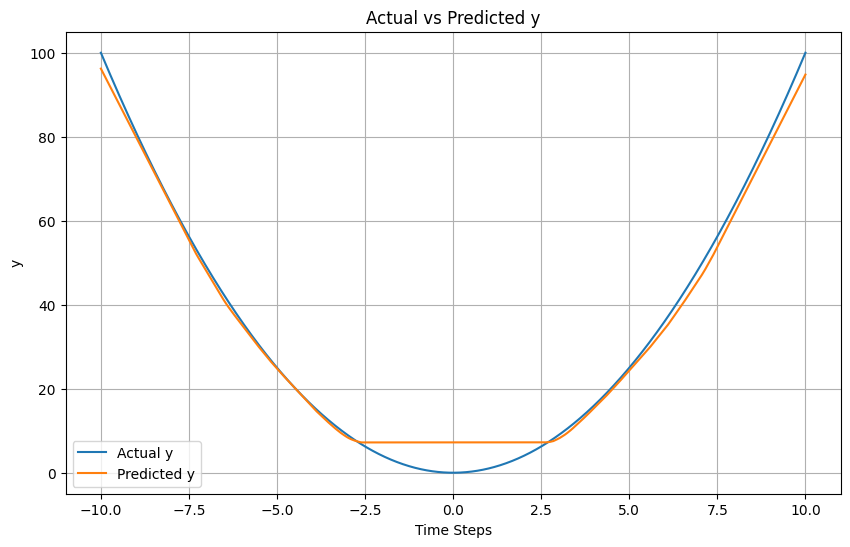

In [21]:
y_pred = model.predict(df['time_steps'])
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['time_steps'], df['y'], label='Actual y')
plt.plot(df['time_steps'], y_pred, label='Predicted y')
plt.xlabel('Time Steps')
plt.ylabel('y')
plt.title('Actual vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()